Michael Haugan <br>
MSDS 458 - Spring 2019 <br>
Assignment 1 <br>

# overview

Think of the first assignment as serving multiple purposes: (1) exploring neural nets/seeing how they work on a very simple problem, (2) examining alternative neural net structures with a simple, single-hidden layer network, and (3) learning how to fit a neural network directly in Python (or Scikit Learn, TensorFlow, or Keras). This first assignment gives you a choice as to which of these objectives to emphasize.

Bottom line. You may choose the vision data set that you will be looking at, assuming that it is a simple alphabetic or numeric data classification problem. And you may choose the Python coding framework that you use to build the neural net. The neural network should be a fully connected (dense) neural network with a single hidden layer.

This first assignment deals with neural networks for classification of images. The structure of the network should be simple, with only one internal/hidden layer. The intent of the assignment is to give you hands-on, practical experience with not only designing, training, and assessing a neural network, and interpreting the impact of hyperparameters, but to go one step further. 

Regarding exploration, the goal is to understand how the neurons/nodes in a simple single-hidden layer network have learned to represent features within the input data. 

The most important thing is not just to give a summary of classification rates/errors. I trust that you can get a working classifier, or can train a network to do any useful task. 

The important things are to identify - for each different class of input data - what it is that the hidden nodes are responding to. 

# setup

In [199]:
# import packages and set parameters
SET_FIT_INTERCEPT = True
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model 
from time import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, make_scorer  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import tensorflow as tf
from keras import models
from keras import layers
from math import sqrt  # for root mean-squared error calculation

#suppress tf.logging
import logging
logging.getLogger('tensorflow').disabled = True

# suppress warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import warnings
warnings.filterwarnings('ignore')

# data preprocessing

I am using the pre-loaded digits dataset within the sklearn toolbox. This dataset consists of 1797 observations where each observation is an 8x8 image of a digit. The pixel range in values from 0 to 64.

In [200]:
from sklearn import datasets
digits = datasets.load_digits()

<Figure size 432x288 with 0 Axes>

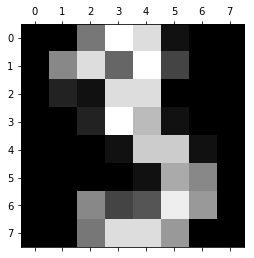

In [201]:
# Visualize the first observation's feature values as an image
plt.gray() 
plt.matshow(digits.images[3]) 
plt.show()

In [202]:
digits.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

In [203]:
# create feature and target arrays
X = digits.data
y = digits.target

In [204]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=23)

In [205]:
print(X_train.shape)
print(X_test.shape)

(1257, 64)
(540, 64)


In [206]:
# scale training data
X_train_scaled = X_train.reshape(-1, 8*8) / 16.0

In [207]:
# scale test data
X_test_scaled = X_test.reshape(-1, 8*8) / 16.0

In [208]:
# ensure values are between 0 and 1 after scaling
print(np.amin(X_arr))
print(np.amax(X_arr))

0.0
1.0


In [209]:
# categorically encode the labels using built in encoder
from keras.utils import to_categorical

y_train_encode = to_categorical(y_train)
y_test_encode = to_categorical(y_test)

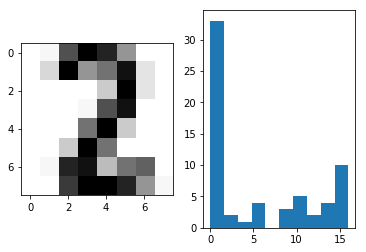

In [280]:
# view pixel intensity for one image
_, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(X_train[0].reshape(8,8), cmap=plt.cm.Greys);
ax2.hist(X_train[0].reshape(64));

# building network 1 - 1 neuron in hidden layer, Test Acc = 0.2130, CPU Time = 5.21s

In [365]:
def base_model():
    network = models.Sequential()
    network.add(layers.Dense(1, activation='relu', input_shape=(8*8,)))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [366]:
# initialize nn
network1 = base_model()

In [367]:
%%time
fitted1 = network1.fit(X_train_scaled, y_train_encode, validation_data=(X_test_scaled, y_test_encode), 
                      epochs=100, batch_size=128, verbose=2)

Train on 1257 samples, validate on 540 samples
Epoch 1/100
 - 1s - loss: 2.3114 - acc: 0.0557 - val_loss: 2.3015 - val_acc: 0.0667
Epoch 2/100
 - 0s - loss: 2.3015 - acc: 0.0963 - val_loss: 2.2971 - val_acc: 0.1204
Epoch 3/100
 - 0s - loss: 2.2961 - acc: 0.1623 - val_loss: 2.2943 - val_acc: 0.1741
Epoch 4/100
 - 0s - loss: 2.2929 - acc: 0.1870 - val_loss: 2.2918 - val_acc: 0.1778
Epoch 5/100
 - 0s - loss: 2.2899 - acc: 0.1854 - val_loss: 2.2886 - val_acc: 0.1796
Epoch 6/100
 - 0s - loss: 2.2865 - acc: 0.1862 - val_loss: 2.2849 - val_acc: 0.1815
Epoch 7/100
 - 0s - loss: 2.2827 - acc: 0.1885 - val_loss: 2.2808 - val_acc: 0.1778
Epoch 8/100
 - 0s - loss: 2.2786 - acc: 0.1901 - val_loss: 2.2766 - val_acc: 0.1833
Epoch 9/100
 - 0s - loss: 2.2743 - acc: 0.1933 - val_loss: 2.2720 - val_acc: 0.1815
Epoch 10/100
 - 0s - loss: 2.2698 - acc: 0.1981 - val_loss: 2.2668 - val_acc: 0.1852
Epoch 11/100
 - 0s - loss: 2.2646 - acc: 0.2021 - val_loss: 2.2614 - val_acc: 0.1870
Epoch 12/100
 - 0s - loss: 

Epoch 97/100
 - 0s - loss: 1.8546 - acc: 0.2363 - val_loss: 1.8568 - val_acc: 0.2130
Epoch 98/100
 - 0s - loss: 1.8519 - acc: 0.2363 - val_loss: 1.8542 - val_acc: 0.2130
Epoch 99/100
 - 0s - loss: 1.8492 - acc: 0.2347 - val_loss: 1.8516 - val_acc: 0.2130
Epoch 100/100
 - 0s - loss: 1.8466 - acc: 0.2363 - val_loss: 1.8495 - val_acc: 0.2130
CPU times: user 5.21 s, sys: 1.39 s, total: 6.6 s
Wall time: 6.03 s


In [369]:
test_loss, test_acc = network1.evaluate(X_test_scaled, y_test_encode)
print('test_acc:', test_acc)

540/540 [==============================] - 0s 24us/step
test_acc: 0.21296296307334192


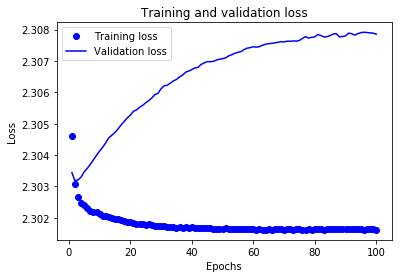

In [214]:
acc = fitted1.history['acc']
val_acc = fitted1.history['val_acc']
loss = fitted1.history['loss']
val_loss = fitted1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

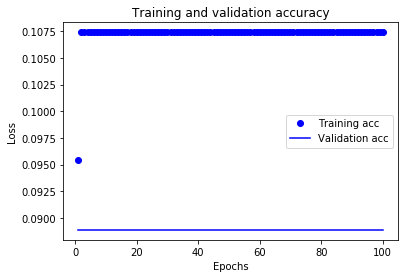

In [215]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

With only 1 neuron our NN does not perform that well. This, however, is expected as 1 neuron in the hidden layer is essentially the same as running multinomial logistic regression, which for image data like this is far inferior to a neural network.

# building network 2 - 32 neurons in hidden layer, Test Acc = 0.9741, CPU Time = 3.19s

In [216]:
def base_model():
    network = models.Sequential()
    network.add(layers.Dense(32, activation='relu', input_shape=(8*8,)))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [217]:
# initialize nn
network2 = base_model()

In [218]:
%%time
fitted2 = network2.fit(X_train_scaled, y_train_encode, validation_data=(X_test_scaled, y_test_encode), 
                      epochs=100, batch_size=128, verbose=2)

Train on 1257 samples, validate on 540 samples
Epoch 1/100
 - 1s - loss: 2.3325 - acc: 0.1917 - val_loss: 2.2429 - val_acc: 0.1833
Epoch 2/100
 - 0s - loss: 2.1868 - acc: 0.2037 - val_loss: 2.1283 - val_acc: 0.2111
Epoch 3/100
 - 0s - loss: 2.0678 - acc: 0.2530 - val_loss: 2.0225 - val_acc: 0.3185
Epoch 4/100
 - 0s - loss: 1.9527 - acc: 0.3755 - val_loss: 1.9098 - val_acc: 0.4463
Epoch 5/100
 - 0s - loss: 1.8366 - acc: 0.4996 - val_loss: 1.7956 - val_acc: 0.5426
Epoch 6/100
 - 0s - loss: 1.7221 - acc: 0.5935 - val_loss: 1.6824 - val_acc: 0.6148
Epoch 7/100
 - 0s - loss: 1.6094 - acc: 0.6611 - val_loss: 1.5733 - val_acc: 0.6741
Epoch 8/100
 - 0s - loss: 1.4983 - acc: 0.7184 - val_loss: 1.4651 - val_acc: 0.7148
Epoch 9/100
 - 0s - loss: 1.3924 - acc: 0.7486 - val_loss: 1.3627 - val_acc: 0.7537
Epoch 10/100
 - 0s - loss: 1.2919 - acc: 0.7804 - val_loss: 1.2651 - val_acc: 0.7889
Epoch 11/100
 - 0s - loss: 1.1973 - acc: 0.8170 - val_loss: 1.1734 - val_acc: 0.8315
Epoch 12/100
 - 0s - loss: 

Epoch 97/100
 - 0s - loss: 0.0835 - acc: 0.9865 - val_loss: 0.1262 - val_acc: 0.9685
Epoch 98/100
 - 0s - loss: 0.0827 - acc: 0.9881 - val_loss: 0.1259 - val_acc: 0.9667
Epoch 99/100
 - 0s - loss: 0.0815 - acc: 0.9873 - val_loss: 0.1232 - val_acc: 0.9704
Epoch 100/100
 - 0s - loss: 0.0806 - acc: 0.9873 - val_loss: 0.1217 - val_acc: 0.9741
CPU times: user 3.19 s, sys: 271 ms, total: 3.47 s
Wall time: 2.83 s


In [219]:
test_loss, test_acc = network2.evaluate(X_test_scaled, y_test_encode)
print('test_acc:', test_acc)

540/540 [==============================] - 0s 32us/step
test_acc: 0.9740740749571059


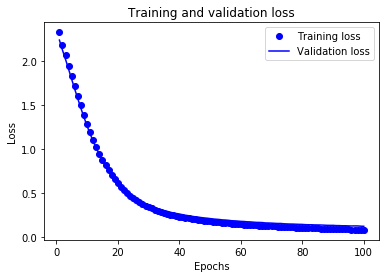

In [220]:
acc = fitted2.history['acc']
val_acc = fitted2.history['val_acc']
loss = fitted2.history['loss']
val_loss = fitted2.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

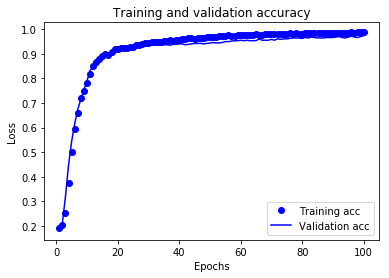

In [221]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

With 32 neurons in the hidden layer our NN does far better at predicting out of sample observations. 

# building network 3 - 64 neurons in hidden layer, Test Acc = 0.9778, CPU Time = 3.41s

I will now build the NN with as many hidden nodes as inputs (in this case because our images are of size 8x8 we have 64 different pixels per image)

In [222]:
def base_model():
    network = models.Sequential()
    network.add(layers.Dense(64, activation='relu', input_shape=(8*8,)))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [223]:
# initialize nn
network3 = base_model()

In [224]:
%%time
fitted3 = network3.fit(X_train_scaled, y_train_encode, validation_data=(X_test_scaled, y_test_encode), 
                      epochs=100, batch_size=128, verbose=2)

Train on 1257 samples, validate on 540 samples
Epoch 1/100
 - 1s - loss: 2.3579 - acc: 0.1480 - val_loss: 2.2293 - val_acc: 0.1519
Epoch 2/100
 - 0s - loss: 2.1179 - acc: 0.2076 - val_loss: 2.0309 - val_acc: 0.2870
Epoch 3/100
 - 0s - loss: 1.9386 - acc: 0.4702 - val_loss: 1.8619 - val_acc: 0.5889
Epoch 4/100
 - 0s - loss: 1.7716 - acc: 0.6476 - val_loss: 1.7032 - val_acc: 0.6685
Epoch 5/100
 - 0s - loss: 1.6126 - acc: 0.6969 - val_loss: 1.5502 - val_acc: 0.7185
Epoch 6/100
 - 0s - loss: 1.4591 - acc: 0.7359 - val_loss: 1.4028 - val_acc: 0.7500
Epoch 7/100
 - 0s - loss: 1.3125 - acc: 0.7876 - val_loss: 1.2622 - val_acc: 0.7944
Epoch 8/100
 - 0s - loss: 1.1770 - acc: 0.8162 - val_loss: 1.1363 - val_acc: 0.8037
Epoch 9/100
 - 0s - loss: 1.0545 - acc: 0.8377 - val_loss: 1.0243 - val_acc: 0.8241
Epoch 10/100
 - 0s - loss: 0.9459 - acc: 0.8632 - val_loss: 0.9252 - val_acc: 0.8444
Epoch 11/100
 - 0s - loss: 0.8517 - acc: 0.8791 - val_loss: 0.8344 - val_acc: 0.8667
Epoch 12/100
 - 0s - loss: 

Epoch 97/100
 - 0s - loss: 0.0587 - acc: 0.9912 - val_loss: 0.1026 - val_acc: 0.9759
Epoch 98/100
 - 0s - loss: 0.0579 - acc: 0.9920 - val_loss: 0.1027 - val_acc: 0.9759
Epoch 99/100
 - 0s - loss: 0.0576 - acc: 0.9920 - val_loss: 0.1038 - val_acc: 0.9722
Epoch 100/100
 - 0s - loss: 0.0564 - acc: 0.9912 - val_loss: 0.1006 - val_acc: 0.9778
CPU times: user 3.41 s, sys: 302 ms, total: 3.71 s
Wall time: 2.92 s


In [225]:
test_loss, test_acc = network3.evaluate(X_test_scaled, y_test_encode)
print('test_acc:', test_acc)

540/540 [==============================] - 0s 21us/step
test_acc: 0.9777777764532302


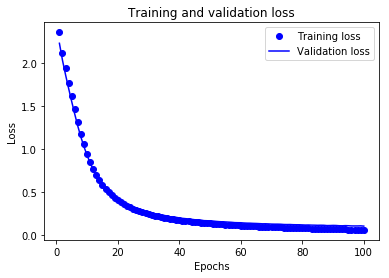

In [226]:
acc = fitted3.history['acc']
val_acc = fitted3.history['val_acc']
loss = fitted3.history['loss']
val_loss = fitted3.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

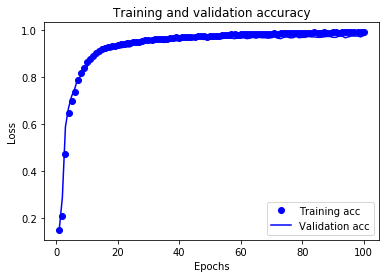

In [227]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Very similar overall to the 32 node layer shown previously. Doubling the number of hidden nodes in the layer did not show to make a dramatic affect on overall performance, however, we did see a slight increase in test accuracy and when we are dealing with NN's at this magnitude a small increase in accuracy can be a big deal.

# building network 4 - 192 neurons in hidden layer (Test Acc = 0.9778, CPU time = 4.17s)

3 times as many hidden nodes as inputs


In [229]:
def base_model():
    network = models.Sequential()
    network.add(layers.Dense(192, activation='relu', input_shape=(8*8,)))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [230]:
# initialize nn
network4 = base_model()

In [231]:
%%time
fitted4 = network4.fit(X_train_scaled, y_train_encode, validation_data=(X_test_scaled, y_test_encode), 
                      epochs=100, batch_size=128, verbose=2)

Train on 1257 samples, validate on 540 samples
Epoch 1/100
 - 1s - loss: 2.1344 - acc: 0.3898 - val_loss: 1.9741 - val_acc: 0.5630
Epoch 2/100
 - 0s - loss: 1.8208 - acc: 0.6897 - val_loss: 1.6657 - val_acc: 0.7722
Epoch 3/100
 - 0s - loss: 1.5201 - acc: 0.8178 - val_loss: 1.3787 - val_acc: 0.8463
Epoch 4/100
 - 0s - loss: 1.2443 - acc: 0.8671 - val_loss: 1.1220 - val_acc: 0.8722
Epoch 5/100
 - 0s - loss: 0.9998 - acc: 0.8854 - val_loss: 0.9040 - val_acc: 0.8833
Epoch 6/100
 - 0s - loss: 0.8036 - acc: 0.8998 - val_loss: 0.7370 - val_acc: 0.8944
Epoch 7/100
 - 0s - loss: 0.6552 - acc: 0.9181 - val_loss: 0.6135 - val_acc: 0.9074
Epoch 8/100
 - 0s - loss: 0.5470 - acc: 0.9308 - val_loss: 0.5288 - val_acc: 0.9111
Epoch 9/100
 - 0s - loss: 0.4673 - acc: 0.9316 - val_loss: 0.4578 - val_acc: 0.9204
Epoch 10/100
 - 0s - loss: 0.4063 - acc: 0.9395 - val_loss: 0.4144 - val_acc: 0.9296
Epoch 11/100
 - 0s - loss: 0.3621 - acc: 0.9419 - val_loss: 0.3695 - val_acc: 0.9259
Epoch 12/100
 - 0s - loss: 

Epoch 97/100
 - 0s - loss: 0.0250 - acc: 0.9976 - val_loss: 0.0868 - val_acc: 0.9759
Epoch 98/100
 - 0s - loss: 0.0245 - acc: 0.9976 - val_loss: 0.0906 - val_acc: 0.9741
Epoch 99/100
 - 0s - loss: 0.0240 - acc: 0.9976 - val_loss: 0.0860 - val_acc: 0.9778
Epoch 100/100
 - 0s - loss: 0.0233 - acc: 0.9976 - val_loss: 0.0872 - val_acc: 0.9778
CPU times: user 4.17 s, sys: 401 ms, total: 4.57 s
Wall time: 3.36 s


In [233]:
test_loss, test_acc = network4.evaluate(X_test_scaled, y_test_encode)
print('test_acc:', test_acc)

540/540 [==============================] - 0s 25us/step
test_acc: 0.9777777786608095


Very minimal improvement from prior NN that had 64 (as many hidden nodes as inputs) hidden nodes

In [340]:
# view activations from NN
hidden4 = Sequential()
hidden4.add(layers.Dense(192, weights=network4.layers[0].get_weights(), activation='relu'))
activations4 = hidden4.predict(X_test_scaled)
activations4

array([[0.40790787, 0.6582167 , 1.7953825 , ..., 0.9493649 , 0.        ,
        0.40830982],
       [0.4763054 , 1.1086025 , 1.5821809 , ..., 0.1695737 , 0.        ,
        0.57187885],
       [0.52301466, 0.        , 0.16390008, ..., 0.        , 0.38349506,
        0.9488825 ],
       ...,
       [0.9168021 , 0.89374703, 0.735376  , ..., 0.        , 0.        ,
        0.78373   ],
       [0.44295415, 0.69261813, 0.01648272, ..., 0.        , 1.0147011 ,
        0.3619949 ],
       [0.77858853, 1.154456  , 0.94089526, ..., 0.3727568 , 0.        ,
        0.6428233 ]], dtype=float32)

# building MLP 1 - 32 neurons in hidden layer, Test Acc = 0.9333, CPU Time = 682ms

In [370]:
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(hidden_layer_sizes = (32,), max_iter=100, solver = 'sgd', verbose = 10, tol = 1e-4, 
                     random_state = 23, learning_rate_init=.1)

In [371]:
%%time
mlp1.fit(X_train_scaled, y_train_encode)
print("Training score:%f" %mlp1.score(X_train_scaled, y_train_encode))
print("Test score:%f" %mlp1.score(X_test_scaled, y_test_encode))

Iteration 1, loss = 4.23294293
Iteration 2, loss = 2.81002906
Iteration 3, loss = 2.01063443
Iteration 4, loss = 1.37977834
Iteration 5, loss = 1.03233215
Iteration 6, loss = 0.81827377
Iteration 7, loss = 0.67141365
Iteration 8, loss = 0.56787551
Iteration 9, loss = 0.49309429
Iteration 10, loss = 0.43058598
Iteration 11, loss = 0.39241072
Iteration 12, loss = 0.36546602
Iteration 13, loss = 0.33274475
Iteration 14, loss = 0.31601595
Iteration 15, loss = 0.30561893
Iteration 16, loss = 0.28476319
Iteration 17, loss = 0.26685992
Iteration 18, loss = 0.26440770
Iteration 19, loss = 0.25033887
Iteration 20, loss = 0.23663038
Iteration 21, loss = 0.23438038
Iteration 22, loss = 0.22327646
Iteration 23, loss = 0.21170959
Iteration 24, loss = 0.20521149
Iteration 25, loss = 0.19648069
Iteration 26, loss = 0.19168435
Iteration 27, loss = 0.18874921
Iteration 28, loss = 0.18049271
Iteration 29, loss = 0.17721174
Iteration 30, loss = 0.17395708
Iteration 31, loss = 0.16596821
Iteration 32, los

Overall, the MLP does show some overfitting and performs worse than our NN's.

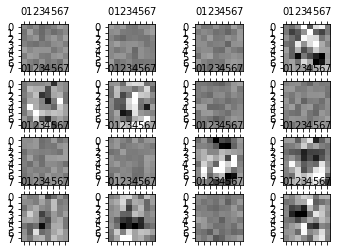

In [358]:
# visualize activations
fig, axes = plt.subplots(4, 4)
# use global min/max to ensure all weights are shown on the same scale
vmin, vmax = mlp1.coefs_[0].min(), mlp1.coefs_[0].max()
for coef, ax in zip(mlp1.coefs_[0].T, axes.ravel()):
  ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 *vmin, vmax = .5* vmax)

plt.show()

# summary & recommendation

Our NN's within Keras performed far better than our MLP within sklearn. Overall, our NN with 192 neurons within the hidden layer (3 times as many inputs) performed the best and had only marginal increases in CPU time. Because our dataset is so small CPU time was not a concern and I could freely work on building the most robust NN possible. 

Because of these reasons (and if we are only allowed 1 hidden layer) I would recommend the network to have 192 neurons with the relu activation. 